In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cancer = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
cancer.size

18208

In [6]:
cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
cancer[cancer.duplicated(subset=['id'],keep=False)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [8]:
cancer.drop(['id'],axis=1,inplace=True)

<Axes: xlabel='diagnosis', ylabel='count'>

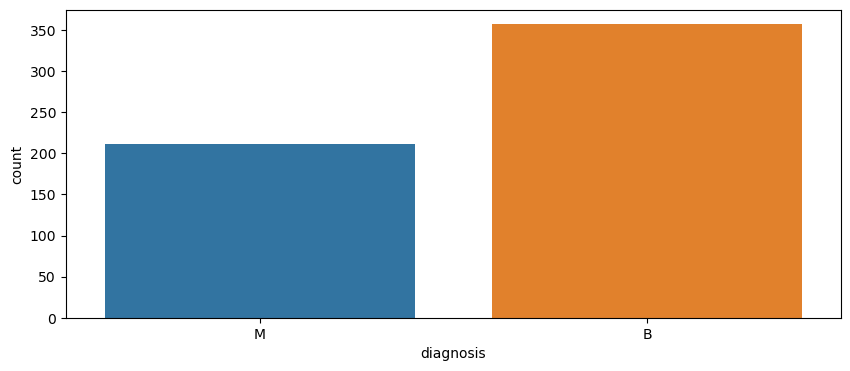

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(data=cancer,x='diagnosis')

In [10]:
cancer['diagnosis']=cancer['diagnosis'].replace({'M':0,'B':1})

In [11]:
count_malignant = cancer[cancer['diagnosis'] == 1].shape[0]
count_benign = cancer[cancer['diagnosis'] == 0].shape[0]

# Calculate the total number of samples
total_samples = count_malignant + count_benign

# Calculate the percentage of each class
percentage_malignant = (count_malignant / total_samples) * 100
percentage_benign = (count_benign / total_samples) * 100

print(f"Percentage of malignant samples: {percentage_malignant:.2f}%")
print(f"Percentage of benign samples: {percentage_benign:.2f}%")

Percentage of malignant samples: 62.74%
Percentage of benign samples: 37.26%


<Axes: xlabel='diagnosis', ylabel='count'>

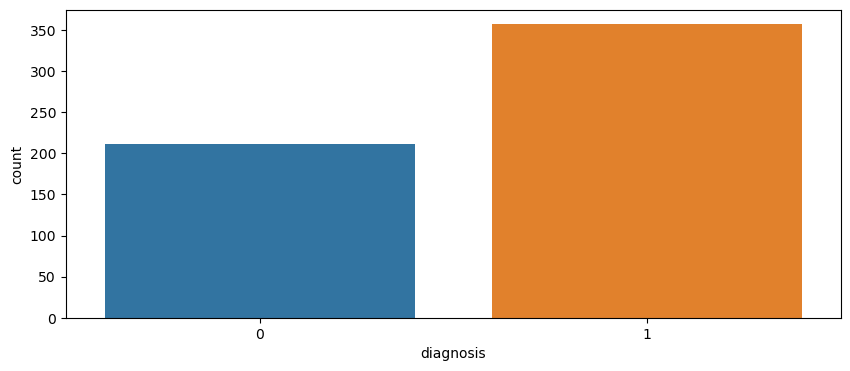

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data=cancer,x='diagnosis')

In [13]:
X=cancer.drop('diagnosis',axis=1).values
y=cancer['diagnosis'].values
names = cancer.drop("diagnosis", axis=1).columns

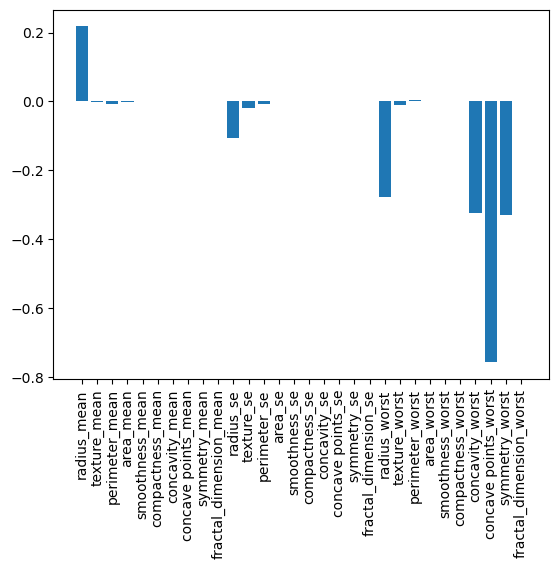

In [14]:
lasso = Lasso(alpha=0.001,max_iter=10000)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [15]:
X_radius_mean = cancer[['radius_mean']]
X_radius_mean = X_radius_mean.values.reshape(-1, 1)

In [16]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_radius_mean, y, test_size=0.3,random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [17]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
logref = LogisticRegression()
cv_results = cross_val_score(logreg, X_radius_mean, y, cv=kf)

mean_score = np.mean(cv_results)
std_score = np.std(cv_results)

print("Cross-Validation Scores:", cv_results)
print("Mean Score:", mean_score)
print("Standard Deviation of Scores:", std_score)

Cross-Validation Scores: [0.92682927 0.8902439  0.87654321 0.85185185 0.90123457 0.82716049
 0.86419753]
Mean Score: 0.8768658321503849
Standard Deviation of Scores: 0.030533501059606203


In [18]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9122807017543859
Precision: 0.9043478260869565
Recall: 0.9629629629629629
F1-score: 0.9327354260089685
Confusion Matrix:
 [[ 52  11]
 [  4 104]]


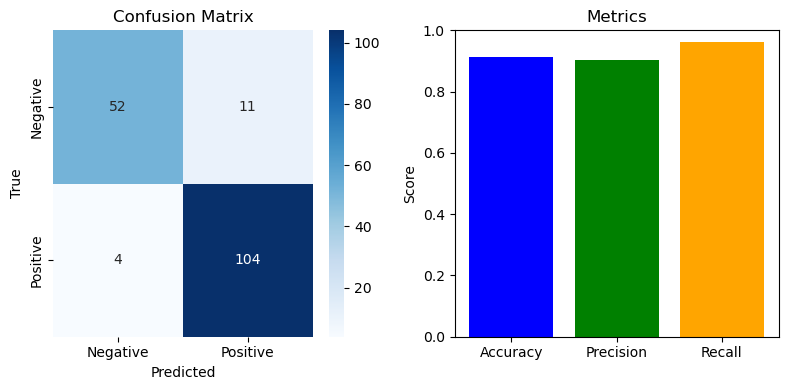

In [19]:
labels = ['Negative', 'Positive']
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.subplot(132)
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy, precision, recall], color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

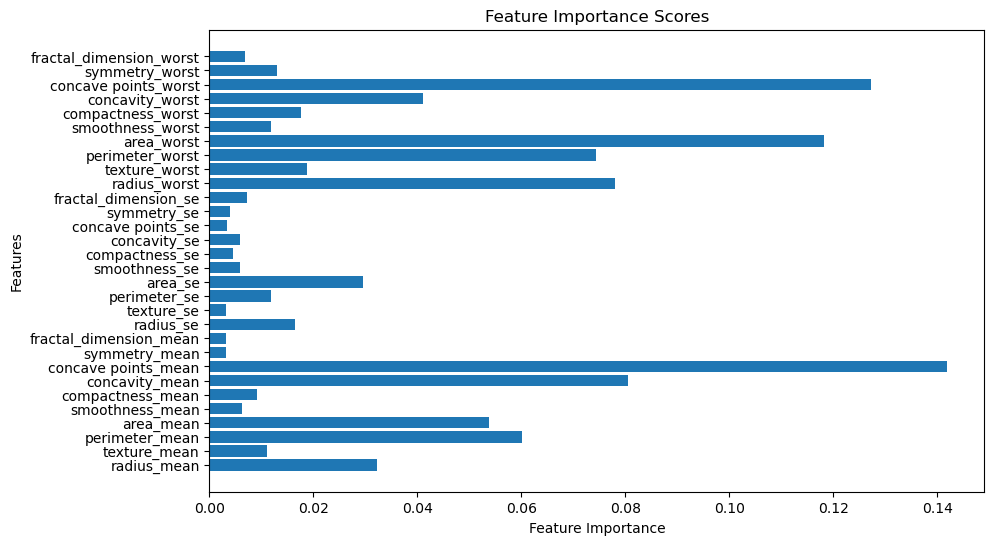

Selected features: Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


In [20]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Retrieve feature importance scores
importance_scores = rf.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(names)), importance_scores, align='center')
plt.yticks(range(len(names)), names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

# Select features based on a threshold
threshold = 0.05
selected_features = names[importance_scores > threshold]

print("Selected features:", selected_features)

In [21]:
X_selected=cancer[['perimeter_mean','area_mean','concavity_mean','concave points_mean','radius_worst',
                  'perimeter_worst', 'area_worst',
                  'concave points_worst']].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3,random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407
F1-score: 0.981651376146789
Confusion Matrix:
 [[ 60   3]
 [  1 107]]


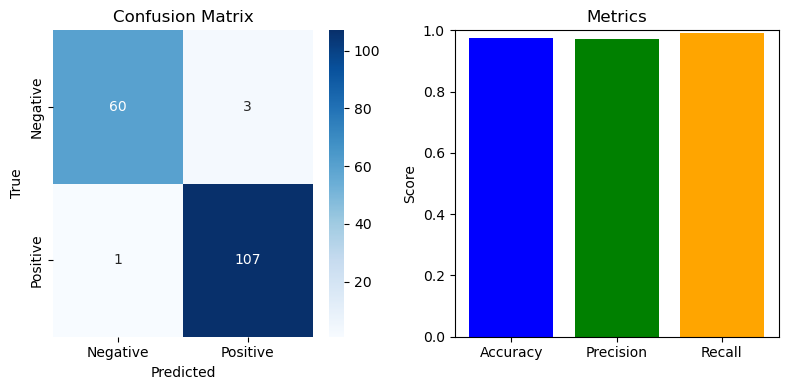

In [24]:
labels = ['Negative', 'Positive']
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.subplot(132)
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy, precision, recall], color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [25]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
logref = LogisticRegression()
cv_results = cross_val_score(logreg, X_selected, y, cv=kf)

mean_score = np.mean(cv_results)
std_score = np.std(cv_results)

print("Cross-Validation Scores:", cv_results)
print("Mean Score:", mean_score)
print("Standard Deviation of Scores:", std_score)

Cross-Validation Scores: [0.98780488 0.97560976 0.92592593 0.90123457 0.95061728 0.90123457
 0.91358025]
Mean Score: 0.9365724609627047
Standard Deviation of Scores: 0.032700921812929315


In [26]:
y_train_pred = logreg.predict(X_train)
# Compute accuracy
accuracy = accuracy_score(y_train,y_train_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_train,y_train_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_train,y_train_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_train,y_train_pred)
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9296482412060302
Precision: 0.9367588932806324
Recall: 0.9518072289156626
F1-score: 0.9442231075697212
Confusion Matrix:
 [[133  16]
 [ 12 237]]


In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [28]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(rf, X_selected, y, cv=kf)

mean_score = np.mean(cv_results)
std_score = np.std(cv_results)

print("Cross-Validation Scores:", cv_results)
print("Mean Score:", mean_score)
print("Standard Deviation of Scores:", std_score)

Cross-Validation Scores: [0.97560976 0.95121951 0.96296296 0.9382716  0.95061728 0.92592593
 0.9382716 ]
Mean Score: 0.9489826644298187
Standard Deviation of Scores: 0.015460516568531766
